url: https://github.com/SamCress96/620-Mod6

# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Samantha Cress

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Question 1 Start

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests

response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')

print(response.status_code)
print(response.headers['content-type'])

200
text/html; charset=UTF-8


In [2]:
from bs4 import BeautifulSoup

# parser = 'html5lib'
parser = 'html.parser'

soup = BeautifulSoup(response.text, parser)

In [3]:
article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text

In [4]:
import pickle
with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

In [5]:
with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)

In [6]:
soup = BeautifulSoup(article_html, parser)

In [7]:
article_element = soup.find('article')
print(article_element)

<article class="post-466450 post type-post status-publish format-standard has-post-thumbnail hentry category-car-hacks category-engineering category-featured category-laser-hacks category-slider tag-laser tag-laser-headlight tag-laser-headlights tag-light" id="post-466450" itemscope="" itemtype="http://schema.org/Article">
<header class="entry-header">
<h1 class="entry-title" itemprop="name">How Laser Headlights Work</h1>
<div class="entry-meta">
<a class="comments-counts" href="https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/#comments"><span class="icon-hackaday icon-hackaday-comment"></span>
                130 Comments            </a>
<ul class="meta-authors vcard author">
<li>by:</li>
<span class="fn"><a class="author url fn" href="https://web.archive.org/web/20210327165005/https://hackaday.com/author/lewinday/" rel="author" title="Posts by Lewin Day">Lewin Day</a></span>
</ul>
</div><!-- .entry-meta -->
<div class="entry-meta en

## Question 1 End

## Question 2 Start

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [8]:
import requests 
import pandas as pd 
from bs4 import BeautifulSoup 
 
def getdata(url): 
    r = requests.get(url) 
    return r.text 
  
htmldata = getdata("https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/") 
soup = BeautifulSoup(htmldata, 'html.parser') 
data = '' 
for data in soup.find_all("p"): 
    print(data.get_text()) 

When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance away. Thankfully for our eyes, laser headlights don’t work in this way at all.
Instead, laser headlights consist of one or more solid state laser diode

## Question 2 End

## Question 3 Start

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [11]:
import spacy

In [12]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_element.get_text())
from collections import Counter

In [13]:
def important_token(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.text.lower() for token in doc if important_token(token)]
word_freq = Counter(map(str,interesting_tokens))
best_token = (word_freq.most_common(5))
print(best_token)


[('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]


In [14]:
best_tokens = set()
for token, freq in word_freq.most_common(5):
    best_tokens.add(token)
print(best_tokens)

{'headlights', 'laser', 'headlight', 'technology', 'led'}


## Question 3 End

## Question 4 Start

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [15]:
interesting_lemmas = [token.lemma_.lower() for token in doc if important_token(token)]
lemma_freq = Counter(interesting_lemmas)
best_lemmas= lemma_freq.most_common(5)
print(best_lemmas)

[('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)]


In [16]:
best_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    best_lemmas.add(lemma)
print(best_lemmas)

{'laser', 'beam', 'headlight', 'technology', 'led'}


## End Question 4

## Question 5 Start

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [18]:
sentences = list(doc.sents)
def sentence_length (sent): ## For lemmas
    count = 0
    for lemma in sent:
        if lemma.lemma_.lower() in best_lemmas:
            if not(lemma.is_space or lemma.is_punct):
                count += 1
    return count
print(sentence_length(sentences[5]), sentences[5])

2 Now, a new technology is on the scene, with lasers!




In [19]:
def sentence_length (sent): ## Counts Total Words
    count = 0
    for lemma in sent:
            if not(lemma.is_space or lemma.is_punct):
                count += 1
    return count
print(sentence_length(sentences[5]), sentences[5])

10 Now, a new technology is on the scene, with lasers!




In [20]:
def sentence_length (sent): ## For lemmas
    count = 0
    for lemma in sent:
        if lemma.lemma_.lower() in best_lemmas:
            if not(lemma.is_space or lemma.is_punct):
                count += 1
    return count
bestCount = sentence_length(sentences[5])
print(bestCount)
def sentence_length (sent):
    count = 0
    for lemma in sent:
        if not(lemma.is_space or lemma.is_punct):
            count += 1
    return count
totalWords = sentence_length(sentences[5])
print(totalWords)
def score_sentence_by_lemma(sentence, interesting_lemma):
    
    return bestCount/TotalWords
print('Output: score_sentence_by_lemma: ',bestCount,'/',totalWords, bestCount/totalWords)

2
10
Output: score_sentence_by_lemma:  2 / 10 0.2


In [21]:
def sentence_length (sent): ## For Tokens
    count = 0
    for token in sent:
        if token.text.lower() in best_tokens:
            if not(token.is_space or token.is_punct):
                count += 1
    return count
print(sentence_length(sentences[7]), sentences[7])

2 BWM’s prototype laser headlight assemblies undergoing testing.



In [22]:
def sentence_length (sent): # Counts total words
    count = 0
    for token in sent:
            if not(token.is_space or token.is_punct):
                count += 1
    return count
print(sentence_length(sentences[7]), sentences[7])

8 BWM’s prototype laser headlight assemblies undergoing testing.



In [23]:
def sentence_length (sent): ## For tokens
    count = 0
    for token in sent:
        if token.text.lower() in best_tokens:
            if not(token.is_space or token.is_punct):
                count += 1
    return count
bestCount = sentence_length(sentences[7])
print(bestCount)
def sentence_length (sent):
    count = 0
    for token in sent:
        if not(token.is_space or token.is_punct):
            count += 1
    return count
totalWords = sentence_length(sentences[7])
print(totalWords)
def score_sentence_by_token(sentence, interesting_token):
    
    return bestCount/TotalWords
print('Output: score_sentence_by_token: ',bestCount,'/',totalWords, bestCount/totalWords)

2
8
Output: score_sentence_by_token:  2 / 8 0.25


## Question 5 End

## Question 6 Start

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [24]:
sentences = list(doc.sents) # Finds score for each sentence
for sentence in sentences:
    count1= 0
    for token in sentence:
        if token.text.lower() in best_tokens:
            count1+= 1
    count2 = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count2 += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count1/count2,':',sent_str)

0.16666666666666666 : How Laser Headlights Work        130 Comments      by:Lewin DayMarch 22, 2021
0.09523809523809523 : When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
0.0 : Engines, fuel efficiency, and the switch to electric power are all more front of mind.
0.0 : However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
0.038461538461538464 : Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
0.1 : Now, a new technology is on the scene, with lasers!
1.0 : Laser Headlights?!
0.25 : BWM’s prototype laser headlight assemblies undergoing testing.
0.13043478260869565 : The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile.
0.0 : 

In [25]:
sentences = list(doc.sents) # Returns only scores
tscore = list()
for sentence in sentences:
    count1= 0
    for token in sentence:
        if token.text.lower() in best_tokens:
            count1+= 1
    count2 = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count2 += 1
            count1/count2

In [26]:
TokensHist= [0.16666666666666666, 0.09523809523809523,0.0,0.0,0.038461538461538464,0.1,1.0,0.25,0.13043478260869565,0.0,
0.14285714285714285,0.25,0.0,0.045454545454545456,0.2222222222222222,0.0,0.1875,0.15,0.09090909090909091,0.07692307692307693,
0.05263157894736842,0.0,0.045454545454545456,0.07407407407407407,0.038461538461538464,0.0,0.03333333333333333,0.29411764705882354,
0.05555555555555555,0.0,0.14285714285714285,0.15151515151515152,0.05263157894736842,0.05555555555555555,0.12903225806451613,
0.0,0.0,0.0,0.07142857142857142,0.07142857142857142,0.0,0.0,0.04,0.05555555555555555,0.125,0.07317073170731707,
0.03225806451612903,0.08333333333333333,0.1111111111111111,0.04,0.12,0.06060606060606061,0.08695652173913043,
0.07407407407407407,0.0,0.0,0.4]

In [27]:
import numpy as np
import pandas as pd
%matplotlib inline

In [28]:
df = pd.DataFrame(TokensHist)

In [29]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Tokens Histogram')

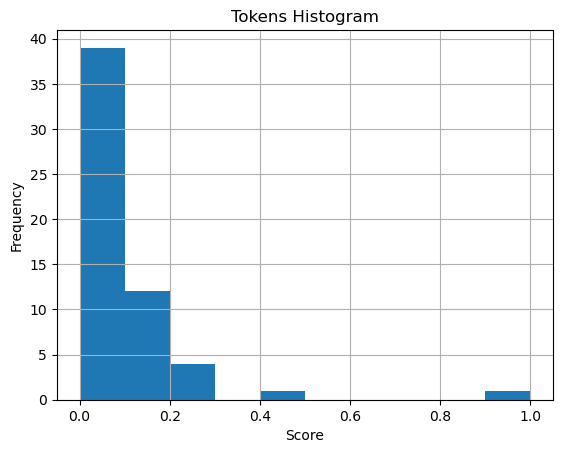

In [30]:
histogram = df.hist()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Tokens Histogram')

## Question 6 End

## Question 7 Start

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [31]:
sentences = list(doc.sents) # Find Score Each Sentence
for sentence in sentences:
    count1= 0
    for lemma in sentence:
        if lemma.lemma_.lower() in best_lemmas:
            count1+= 1
    count2 = 0
    for lemma in sentence:
        if not(lemma.is_space or lemma.is_punct):
            count2 += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count1/count2,':',sent_str)

0.08333333333333333 : How Laser Headlights Work        130 Comments      by:Lewin DayMarch 22, 2021
0.09523809523809523 : When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
0.0 : Engines, fuel efficiency, and the switch to electric power are all more front of mind.
0.0 : However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
0.11538461538461539 : Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
0.2 : Now, a new technology is on the scene, with lasers!
0.5 : Laser Headlights?!
0.25 : BWM’s prototype laser headlight assemblies undergoing testing.
0.17391304347826086 : The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile.
0.04761

In [32]:
sentences = list(doc.sents) # Returns only scores
for sentence in sentences:
    count1= 0
    for lemma in sentence:
        if lemma.lemma_.lower() in best_lemmas:
            count1+= 1
    count2 = 0
    for lemma in sentence:
        if not(lemma.is_space or lemma.is_punct):
            count2 += 1
            count1/count2

In [33]:
lemmaHist = [0.08333333333333333,0.09523809523809523,0.0,0.0 ,0.11538461538461539 ,0.2 ,0.5 ,0.25 ,0.17391304347826086 ,0.047619047619047616 ,
0.14285714285714285 ,0.25 ,0.125 ,0.045454545454545456 ,0.2222222222222222 ,0.045454545454545456 ,0.1875 ,0.15 ,0.09090909090909091 ,
0.11538461538461539 ,0.05263157894736842 ,0.05 ,0.045454545454545456 ,0.1111111111111111 ,0.038461538461538464 ,0.0 ,0.03333333333333333 ,0.29411764705882354 ,0.08333333333333333 ,0.0 ,0.14285714285714285 ,0.15151515151515152 ,0.10526315789473684 ,0.05555555555555555 ,0.0967741935483871 ,
0.0 ,0.0 ,0.0 ,0.07142857142857142 ,0.14285714285714285 ,0.02857142857142857 ,0.0 ,0.04 ,0.1111111111111111 ,0.125 ,0.0975609756097561 ,0.06451612903225806 ,0.08333333333333333 ,
0.1111111111111111 ,0.04 ,0.12 ,0.06060606060606061 ,0.08695652173913043 ,0.07407407407407407 ,0.0 ,0.045454545454545456 ,0.4]

In [34]:
df = pd.DataFrame(lemmaHist) 

Text(0.5, 1.0, 'Lemmas Histogram')

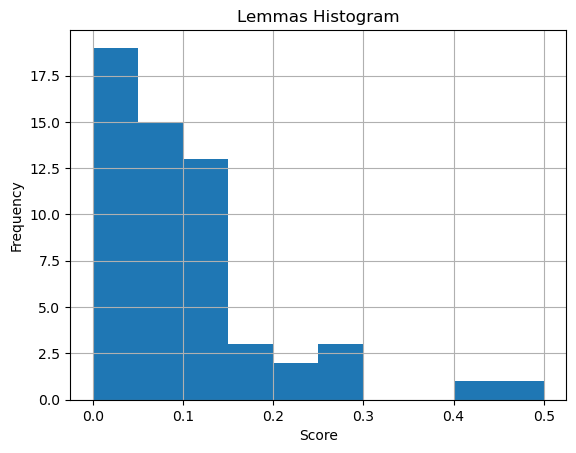

In [35]:
histogram = df.hist()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Lemmas Histogram')

## Question 7 End

## Question 8 Start

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

I believe the scores wouldn't change because all of the interesting words are already nouns. If we had interesting words that weren't nouns then those would be omitted and be replaced frequent nouns. To change the code I believe we would go to the part of the code that is written to only look for tokens that are not punctuation or whitespace as well as strong words. I did some research a think you could use pos tagging. I would write some thing like token.pos = 'NOUN'. 

## Question 8 End